In [1]:
import numpy as np
from collections import defaultdict
import re

### Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)


In [382]:
# read text from .txt file
frankenstein_text = open("frankenstein/frankenstein.txt", "r")
franken_string = frankenstein_text.read()
frankenstein_text.close()

# remove all non alphanumeric and make text lowercase
franken_string_alphanumeric = re.sub(r'\W+', ' ', franken_string.lower())

# split words into list so we can iterate over
text_full = franken_string_alphanumeric
word_list = text_full.split()

# create key value pairs of words
# and word counts for our word_count dictionary
# using a default dict so we dont get a key error
word_count = defaultdict(int)
for word in word_list:
    word_count[word] += 1

In [385]:
word_count

defaultdict(int,
            {'letter': 2,
             '1': 1,
             'to': 35,
             'mrs': 1,
             'saville': 1,
             'england': 1,
             'scrapers': 1,
             'st': 2,
             'petersburgh': 3,
             'dec': 1,
             '11th': 1,
             '17': 1,
             'you': 12,
             'will': 5,
             'rejoice': 1,
             'hear': 1,
             'that': 12,
             'no': 3,
             'disaster': 1,
             'has': 3,
             'accompanied': 2,
             'the': 68,
             'commencement': 1,
             'of': 36,
             'an': 6,
             'enterprise': 2,
             'which': 19,
             'have': 8,
             'regarded': 1,
             'with': 12,
             'such': 2,
             'evil': 1,
             'forebodings': 1,
             'i': 46,
             'arrived': 1,
             'here': 1,
             'yesterday': 1,
             'and': 44,
             'my': 

### Find 4 hidden sentences in the text (they will be words bookended by special symbols)


In [390]:
# replacing indents in text
text = franken_string.replace('\n','')

# idea here is to create a list of all the non-alphanumeric characters that appear in our text
# and make sure we ignore special characters that are commonly used in writing (punctuation etc.)
special_chars = set(re.findall('[^a-zA-Z\d\s:\.\,\;\'\’\!\?\—\-]', text))

secret_message = {}
for char in special_chars: 
    # so the pattern is a word (most typically range 1, 15 characters) and see
    # where special characters occur on both sides
    pattern = "(?<=\\" + char + ')(.{1,15})(?=\\' + char + ')'
    secret_message[char] = re.findall(pattern, a)
    print(re.findall(pattern, a), char)



["You're", 'killin', 'it!'] *
['Found', 'another', 'one!'] #
['Scrapers', 'for', 'the', 'win!'] <
['You', 'are', 'amazing!'] $


### save word count dictionary to json

In [372]:
# save word count dictionary to json
import json 

with open("word_count_dict.json", "w") as outfile:  
    json.dump(word_count, outfile) 

### Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop

In [373]:
# saving the hidden messages as a list of lists
lol = list(secret_message.values())
lol

[["You're", 'killin', 'it!'],
 ['Found', 'another', 'one!'],
 ['Scrapers', 'for', 'the', 'win!'],
 ['You', 'are', 'amazing!']]

In [374]:
import itertools
flatten_list = itertools.chain.from_iterable(lol)
print(' '.join(flatten_list))

You're killin it! Found another one! Scrapers for the win! You are amazing!


In [375]:
# think the question may have been asking for this instead...
for sent in lol:
    print(' '.join(sent))

You're killin it!
Found another one!
Scrapers for the win!
You are amazing!


In [392]:
# secret_message

### Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

In [393]:
secret_message

{'*': ["You're", 'killin', 'it!'],
 '#': ['Found', 'another', 'one!'],
 '<': ['Scrapers', 'for', 'the', 'win!'],
 '$': ['You', 'are', 'amazing!']}

In [376]:
# so now we need to add the special characters to both sides of the words again
# so we can specifically remove hidden messages like $You$ and not
# all other occurrences of the word "You"
stopwords = []
for key, val in secret_message.items():
    for word in val:
        stopwords.append(key + word + key)
        

original_text = franken_string.split()

text_clean = [word for word in original_text if word not in stopwords]
text_clean = ' '.join(text_clean)
text_clean

'Letter 1 To Mrs. Saville, England. St. Petersburgh, Dec. 11th, 17—. You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its broad disk just s

In [377]:
# just realized this ^ doesnt capture the last instance Walton<win!<
# so instead we will just keep calling replace for every secret word
# until there are none left.

text_clean = franken_string
for item in stopwords:
    text_clean = text_clean.replace(item, '') 
    
text_clean

'Letter 1\nTo Mrs. Saville, England. \nSt. Petersburgh, Dec. 11th, 17—.\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my  dear sister of my welfare and increasing confidence in the success of my undertaking.\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents  itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its broad disk

In [366]:
# write cleaned text to txt file.
clean_text_file = open('frankenstein/Clean_Frankenstein.txt', 'w')
clean_text_file.write(text_clean)
clean_text_file.close()

### Plot a histogram of the count of words by word length for all words in the document


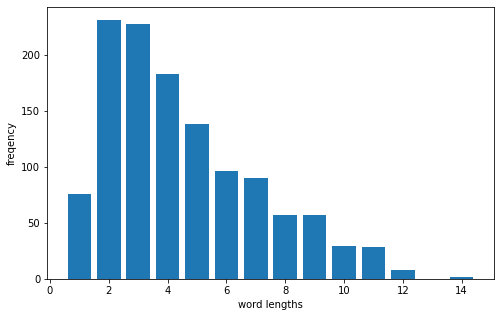

In [381]:
import matplotlib.pyplot as plt
text_clean = text

franken_string_alphanumeric = re.sub(r'\W+', ' ', text_clean.lower())

# split words into list so we can iterate over
text_full = franken_string_alphanumeric
word_list = text_full.split()

word_lengths = defaultdict(int)
for word in word_list:
    word_lengths[len(word)] += 1

plt.figure(figsize=[8,5])
plt.bar(word_lengths.keys(), word_lengths.values());
plt.xlabel('word lengths')
plt.ylabel('freqency');